<a href="https://colab.research.google.com/github/nevilshah444/Dimensionality_reduction_Assignment/blob/main/Tab_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction Techniques

Importing the libraries and the dataset.



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-paper')

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA


Dataset:- the iris dataset

Link:- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [ ]:
# Target variable has 3 classes (setosa,versicolor,virginica)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# how does the dataset looks like?
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
## 150 rows and 4 dimensions
data1 = data.values
data1.shape #it's 2D numpy arra

(150, 4)

#Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA



In [ ]:
from sklearn.preprocessing import StandardScaler
s =  StandardScaler()

#calculate the mean and standard deviation
s.fit(data1)

#transform the values
s1 = s.transform(data1)

In [ ]:
a = PCA(n_components = 2, random_state = 2020)
a.fit(s1)
X = a.transform(s1)

In [ ]:
print('The addition of the variance of both the components = ', sum(a.explained_variance_ratio_*100))

The addition of the variance of both the components =  95.81320720000166


Text(0, 0.5, 'Principal Component 2')

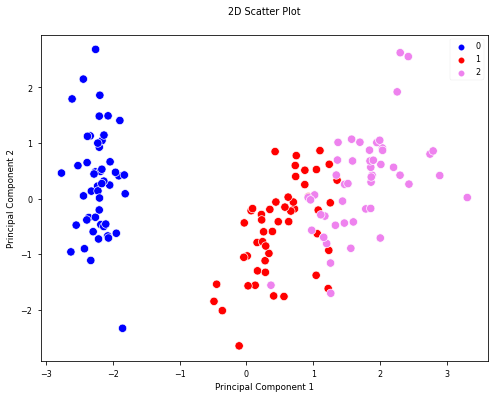

In [ ]:
# visualiztion in 2D scatterplot 
plt.figure(figsize = (8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], s = 70, hue = iris.target, palette = ['blue','red','violet'])

plt.title('2D Scatter Plot', pad = 20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#Singular Value Decomposition(SVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
b =  TruncatedSVD(n_components = 2)
s = b.fit_transform(data)

In [ ]:
print("Transformed Matrix in 2 dimensions :")
print(s[:5])

Transformed Matrix in 2 dimensions :
[[5.91274714 2.30203322]
 [5.57248242 1.97182599]
 [5.44697714 2.09520636]
 [5.43645948 1.87038151]
 [5.87564494 2.32829018]]


In [ ]:
print('The addition of the variance of both the components = ', sum(b.explained_variance_ratio_*100))

The addition of the variance of both the components =  97.72093692426482


Text(0, 0.5, 'SVD 2')

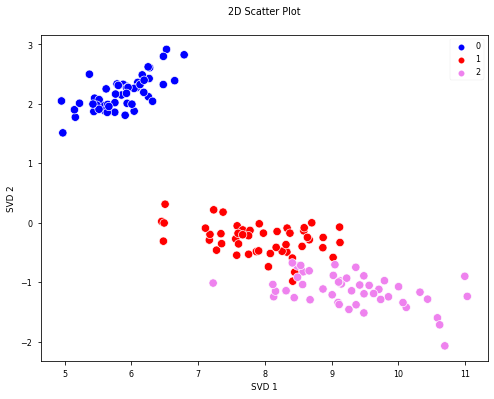

In [ ]:
# visualiztion in 2D scatterplot 
plt.figure(figsize = (8, 6))
sns.scatterplot(x = s[:, 0], y = s[:, 1], s = 70, hue = iris.target, palette = ['blue','red','violet'])

plt.title('2D Scatter Plot', pad = 20)
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')

#LLE Locally Linear Embedding

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(X)



In [ ]:
X_transformed.shape

(150, 2)

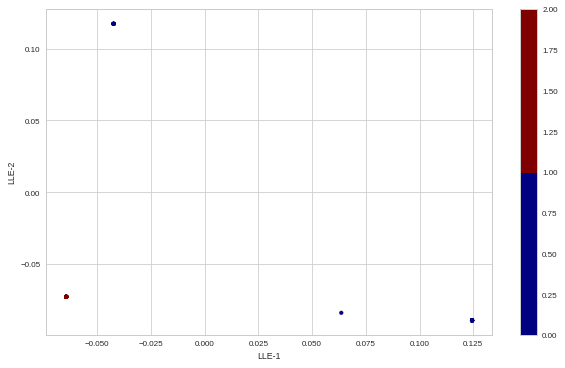

In [ ]:
# visualiztion in 2D scatterplot 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
cd = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = cd , c = iris.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

#tSNE - t Distributed Stochastic Neighbor Embedding

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE().fit_transform(data)

In [ ]:
X_embedded.shape

(150, 2)

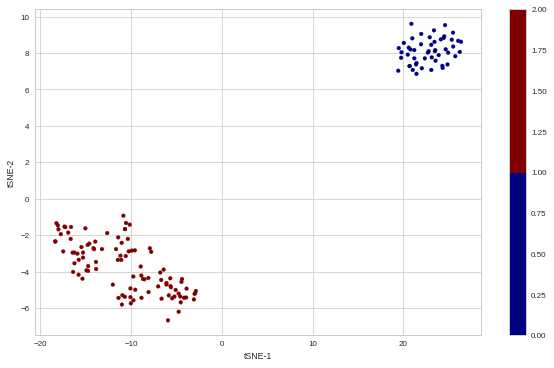

In [ ]:
# visualiztion in 2D scatterplot 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = iris.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

#isometric mapping

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
embedding = Isomap(n_components = 2)

In [ ]:
X_transformed = embedding.fit_transform(X)

In [ ]:
X_transformed.shape

(150, 2)

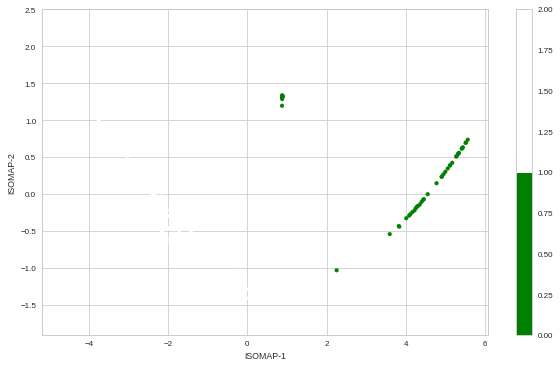

In [ ]:
# visualiztion in 2D scatterplot 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
cd = plt.cm.get_cmap('ocean', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = cd , c = iris.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

#UMAP

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 40.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=ec062e610be910d63155bb14d044223dd37ce997c65da26534316862ab737018
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=f5c1a2a8f5ad6bc54c433b31b87030c1622cd710e2b044c1ec2cd8605d0a7c04
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


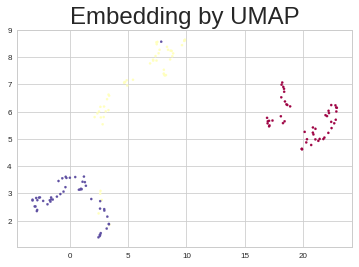

In [ ]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = iris.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24);

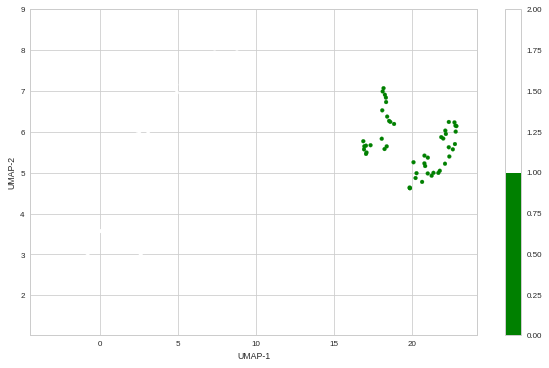

In [ ]:
# visualiztion in 2D scatterplot 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
cd = plt.cm.get_cmap('ocean', 2)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = cd , c = iris.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

In [ ]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA



LLE: 0.022 second
t-SNE: 0.97 second
UMAP: 1.5 second
ISOMAP: 0.01 second
SVD: 0.0033 second
PCA: 0.0016 second


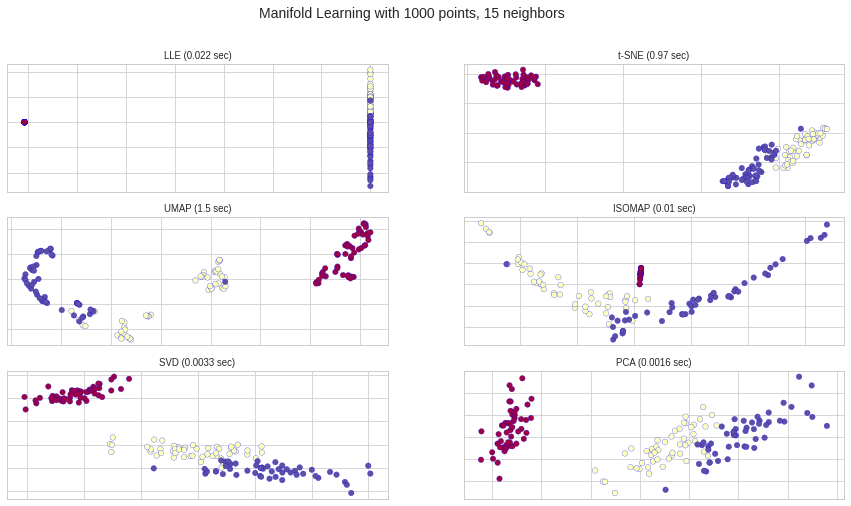

In [ ]:
ne = 15
co = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, ne), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              ne, co, eigen_solver='auto')
m = OrderedDict()
m['LLE'] = LLE()
m['t-SNE'] = manifold.TSNE(n_components=co, init='pca',
                                 random_state=100)
m['UMAP'] = umap.UMAP(n_neighbors=5, random_state=2000, n_components = 2)
m['ISOMAP'] = Isomap(n_components= 2)
m['SVD'] = TruncatedSVD(n_components=2)
m['PCA']=PCA(n_components=2)
# Plotting the results
for i, (l, me) in enumerate(m.items()):
    a = time()
    Y = me.fit_transform(data)
    b = time()
    print("%s: %.2g second" % (l, b - a))
    ax = fig.add_subplot(3, 2, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=iris.target, cmap=plt.cm.Spectral,edgecolors= 'blue')
    ax.set_title("%s (%.2g sec)" % (l, b - a))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

#Conclusion:- Among all the methods of dimensionality reduction, t-SNE and SVD methods are the best methods as the points in the 2D graph are the most scattered which will decrease the complexity.

#references:- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html